In [88]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [89]:
df = pd.read_csv("data/all_energy_statistics.csv")

In [90]:
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [91]:
# Drop Column 
df.drop("quantity_footnotes", axis=1, inplace=True)

In [92]:
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates


In [93]:
AUS = df[df.country_or_area.isin(["Austria"])].sort_values('year')
SUI = df[df.country_or_area.isin(["Switzerland"])].sort_values('year')
GER = df[df.country_or_area.isin(["Germany"])].sort_values('year')

SING = df[df.country_or_area.isin(["Singapore"])].sort_values('year')

In [94]:
#AUS.head()
SING.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1187300,Singapore,White spirit and special boiling point industr...,1990,"Metric tons, thousand",136.0,white_spirit_and_special_boiling_point_industr...
577613,Singapore,Kerosene-type Jet Fuel - Consumption by domest...,1990,"Metric tons, thousand",0.0,kerosene_type_jet_fuel
993086,Singapore,Petroleum coke - Exports,1990,"Metric tons, thousand",1.0,petroleum_coke
532299,Singapore,Hard coal - transformation in gas works,1990,"Metric tons, thousand",1.0,hard_coal
173248,Singapore,Conventional crude oil - exports,1990,"Metric tons, thousand",19.0,conventional_crude_oil


In [95]:
AUS_Wind = AUS[AUS.commodity_transaction == "Electricity - total wind production"].sort_values("year")
AUS_Hydro = AUS[AUS.category == "hydro"].sort_values("year")

SUI_Wind = SUI[SUI.commodity_transaction == "Electricity - total wind production"].sort_values("year")
SUI_Hydro = SUI[SUI.category == "hydro"].sort_values("year")

GER_Wind = GER[GER.commodity_transaction == "Electricity - total wind production"].sort_values("year")
GER_Hydro = GER[GER.category == "hydro"].sort_values("year")

SING_Wind = SING[SING.commodity_transaction == "Electricity - total wind production"].sort_values("year")
SING_Hydro = SING[SING.category == "hydro"].sort_values("year")

In [96]:
#AUS_Wind.head()
#AUS_Hydro.head()

In [33]:
#AUS["category"].unique()

In [34]:
#df["country_or_area"].unique()

In [97]:
# Create DACH Region Dataframe

DACH = AUS.append(SUI)
DACH = DACH.append(GER)

In [98]:
#DACH.head()

In [99]:
#Create DACH Region Hydropower Dataframe with Merge function

DACH_Hydro = pd.merge(AUS_Hydro, SUI_Hydro, on = "year", how = "outer")
DACH_Hydro = pd.merge(DACH_Hydro, GER_Hydro, on = "year", how = "outer")

In [100]:
#DACH_Hydro
DACH_Hydro.drop(['commodity_transaction_y','unit_y','category_y','commodity_transaction_x','unit_x','category_x' ], axis=1,inplace=True)

In [101]:
#DACH_Hydro
DACH_Hydro.rename(columns = {"country_or_area_x": "Austria", "country_or_area_y": "Switzerland", "country_or_area": "Germany"})
#Drop Row with missing values by Index
DACH_Hydro = DACH_Hydro.drop(0)

#DACH_Hydro.head()

In [68]:
DACH_Hydro["Total Hydro"] = DACH_Hydro["quantity_x"] + DACH_Hydro["quantity_y"] + DACH_Hydro["quantity"]

In [102]:
DACH_Hydro.head()

,country_or_area_x,year,quantity_x,country_or_area_y,quantity_y,country_or_area,commodity_transaction,unit,quantity,category
1,Austria,1991,32745.0,Switzerland,33413.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",18699.0,hydro
2,Austria,1992,36099.0,Switzerland,34062.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",21195.0,hydro
3,Austria,1993,37756.0,Switzerland,36612.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",21667.0,hydro
4,Austria,1994,36729.0,Switzerland,39952.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",23885.0,hydro
5,Austria,1995,38114.0,Switzerland,35954.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",26250.0,hydro


In [103]:
DACH_Hydro.rename(columns = {"country_or_area_x": "Austria", "country_or_area_y": "Switzerland", "country_or_area": "Germany", "quantity_x": "AUT_quantity", "quantity_y": "SUI_quantity", "quantity": "GER_quantity"}, inplace = True)

In [104]:
DACH_Hydro.head()

,Austria,year,AUT_quantity,Switzerland,SUI_quantity,Germany,commodity_transaction,unit,GER_quantity,category
1,Austria,1991,32745.0,Switzerland,33413.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",18699.0,hydro
2,Austria,1992,36099.0,Switzerland,34062.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",21195.0,hydro
3,Austria,1993,37756.0,Switzerland,36612.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",21667.0,hydro
4,Austria,1994,36729.0,Switzerland,39952.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",23885.0,hydro
5,Austria,1995,38114.0,Switzerland,35954.0,Germany,Electricity - total hydro production,"Kilowatt-hours, million",26250.0,hydro


In [105]:
y1 = DACH_Hydro.AUT_quantity
x1 = DACH_Hydro.year
y2 = DACH_Hydro.SUI_quantity
x2 = DACH_Hydro.year
y3 = DACH_Hydro.GER_quantity
x3 = DACH_Hydro.year

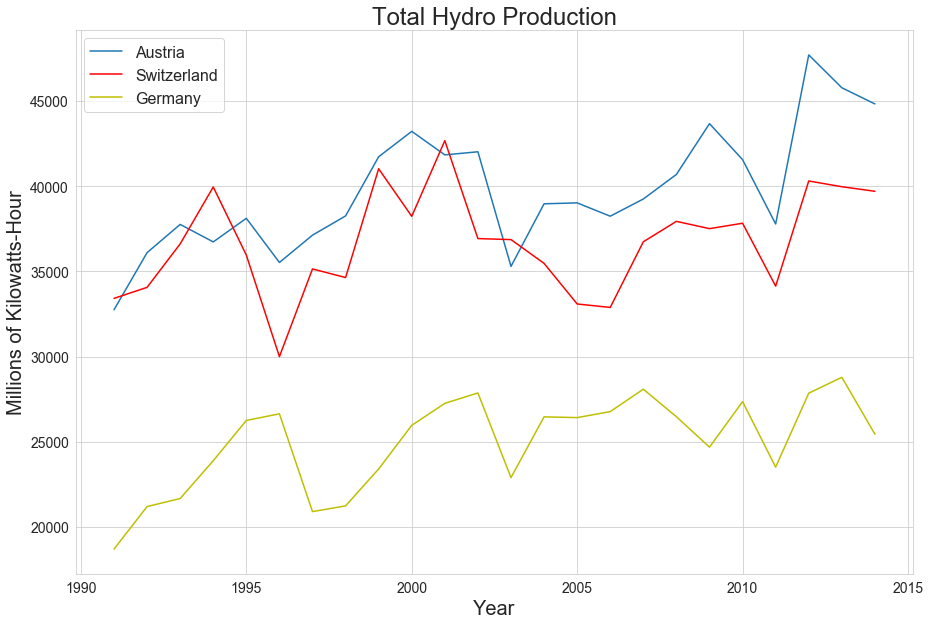

In [106]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="Austria")
plt.plot(x2,y2,'r',label="Switzerland")
plt.plot(x3,y3,'y',label="Germany")


plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Hydro Production',fontsize=24)
plt.show()

In [117]:
#DACH.head()

DACH_Solar = DACH[DACH["commodity_transaction"] == "Electricity - total solar production"]

#DACH_Solar

,country_or_area,commodity_transaction,year,unit,quantity,category
1025800,Austria,Electricity - total solar production,1993,"Kilowatt-hours, million",1.0,solar_electricity
1025799,Austria,Electricity - total solar production,1994,"Kilowatt-hours, million",1.0,solar_electricity
1025798,Austria,Electricity - total solar production,1995,"Kilowatt-hours, million",1.0,solar_electricity
1025797,Austria,Electricity - total solar production,1996,"Kilowatt-hours, million",1.0,solar_electricity
1025796,Austria,Electricity - total solar production,1997,"Kilowatt-hours, million",2.0,solar_electricity
...,...,...,...,...,...,...
1026033,Germany,Electricity - total solar production,2010,"Kilowatt-hours, million",11729.0,solar_electricity
1026032,Germany,Electricity - total solar production,2011,"Kilowatt-hours, million",19599.0,solar_electricity
1026031,Germany,Electricity - total solar production,2012,"Kilowatt-hours, million",26380.0,solar_electricity
1026030,Germany,Electricity - total solar production,2013,"Kilowatt-hours, million",31010.0,solar_electricity


In [137]:
AUT_Solar = DACH_Solar[DACH_Solar["country_or_area"]== "Austria"]
SUI_Solar = DACH_Solar[DACH_Solar["country_or_area"]== "Switzerland"]
GER_Solar = DACH_Solar[DACH_Solar["country_or_area"]== "Germany"]

AUT_Solar = AUT_Solar[AUT_Solar["year"] >= 1993]
SUI_Solar = SUI_Solar[SUI_Solar["year"] >= 1993]
GER_Solar.index = range(len(GER_Solar.index))
GER_Solar = GER_Solar[GER_Solar["year"] >= 1993]
#GER_Solar

In [140]:
ys1 = AUT_Solar.quantity
xs1 = AUT_Solar.year
ys2 = SUI_Solar.quantity
xs2 = SUI_Solar.year
ys3 = GER_Solar.quantity
xs3 = GER_Solar.year

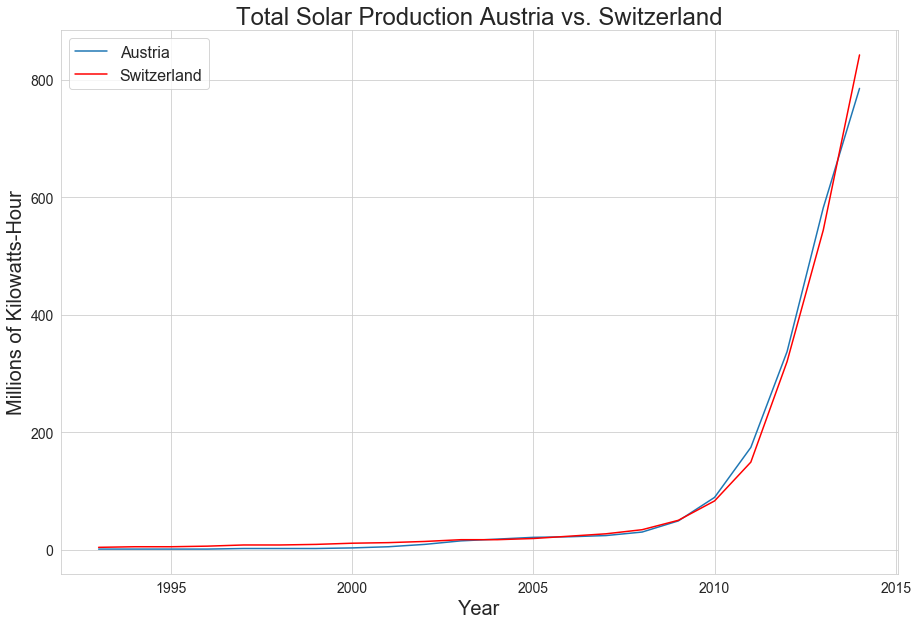

In [143]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(xs1,ys1,label="Austria")
plt.plot(xs2,ys2,'r',label="Switzerland")
#plt.plot(xs3,ys3,'y',label="Germany")


plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Solar Production Austria vs. Switzerland',fontsize=24)
plt.show()

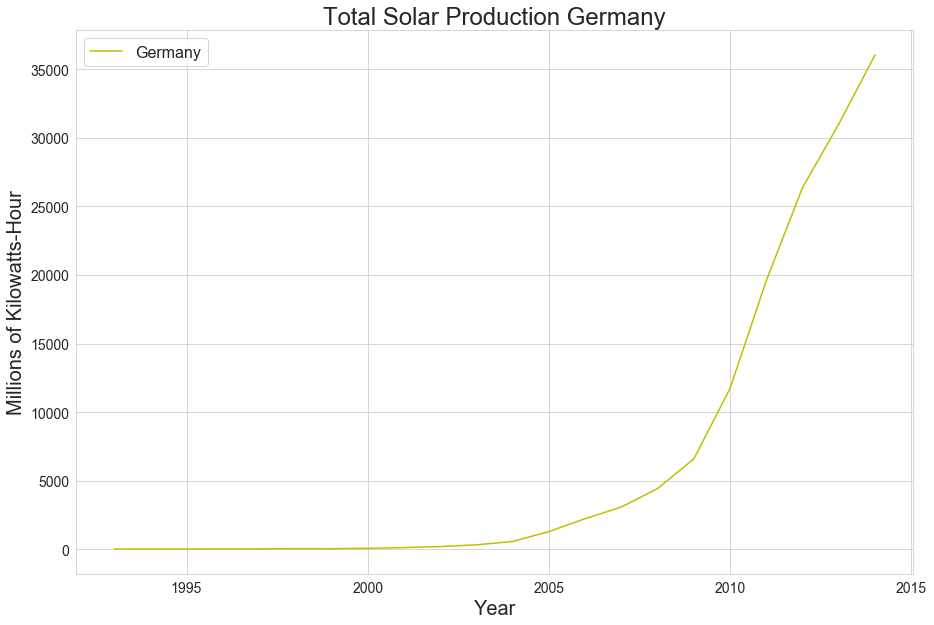

In [144]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(xs3,ys3,'y',label="Germany")


plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Solar Production Germany',fontsize=24)
plt.show()

In [149]:
#Create DACH Region Hydropower Dataframe with Merge function

DACH_Wind = pd.merge(AUS_Wind, SUI_Wind, on = "year", how = "outer")''
DACH_Wind = pd.merge(DACH_Wind, GER_Wind, on = "year", how = "outer")

In [158]:
DACH_Wind = DACH_Wind.drop(0)

KeyError: '[0] not found in axis'

In [159]:
DACH_Wind.rename(columns={"country_or_area_x": "Austria", "country_or_area_y": "Switzerland", "commodity_transaction_x": "Wind Production", "quantity_x": "Wind Power Austria", "quantity_y": "Wind Power Switzerland", "country_or_area": "Germany"}, inplace= True)
DACH_Wind.drop(['commodity_transaction_y','unit_y','category_y','unit_x','category_x', "commodity_transaction"], axis=1,inplace=True)


KeyError: "['commodity_transaction_y' 'unit_y' 'category_y' 'unit_x' 'category_x'\n 'commodity_transaction'] not found in axis"

In [163]:
DACH_Wind = DACH_Wind.dropna()
DACH_Wind

,Austria,Wind Production,year,Wind Power Austria,Switzerland,Wind Power Switzerland,Germany,unit,quantity,category
1,Austria,Electricity - total wind production,1996,5.0,Switzerland,1.0,Germany,"Kilowatt-hours, million",2078.0,wind_electricity
2,Austria,Electricity - total wind production,1997,20.0,Switzerland,2.0,Germany,"Kilowatt-hours, million",3034.0,wind_electricity
3,Austria,Electricity - total wind production,1998,45.0,Switzerland,3.0,Germany,"Kilowatt-hours, million",4593.0,wind_electricity
4,Austria,Electricity - total wind production,1999,51.0,Switzerland,3.0,Germany,"Kilowatt-hours, million",5528.0,wind_electricity
5,Austria,Electricity - total wind production,2000,67.0,Switzerland,3.0,Germany,"Kilowatt-hours, million",9352.0,wind_electricity
6,Austria,Electricity - total wind production,2001,105.0,Switzerland,4.0,Germany,"Kilowatt-hours, million",10456.0,wind_electricity
7,Austria,Electricity - total wind production,2002,140.0,Switzerland,5.0,Germany,"Kilowatt-hours, million",15856.0,wind_electricity
8,Austria,Electricity - total wind production,2003,372.0,Switzerland,5.0,Germany,"Kilowatt-hours, million",18713.0,wind_electricity
9,Austria,Electricity - total wind production,2004,934.0,Switzerland,6.0,Germany,"Kilowatt-hours, million",25509.0,wind_electricity
10,Austria,Electricity - total wind production,2005,1331.0,Switzerland,8.0,Germany,"Kilowatt-hours, million",27229.0,wind_electricity


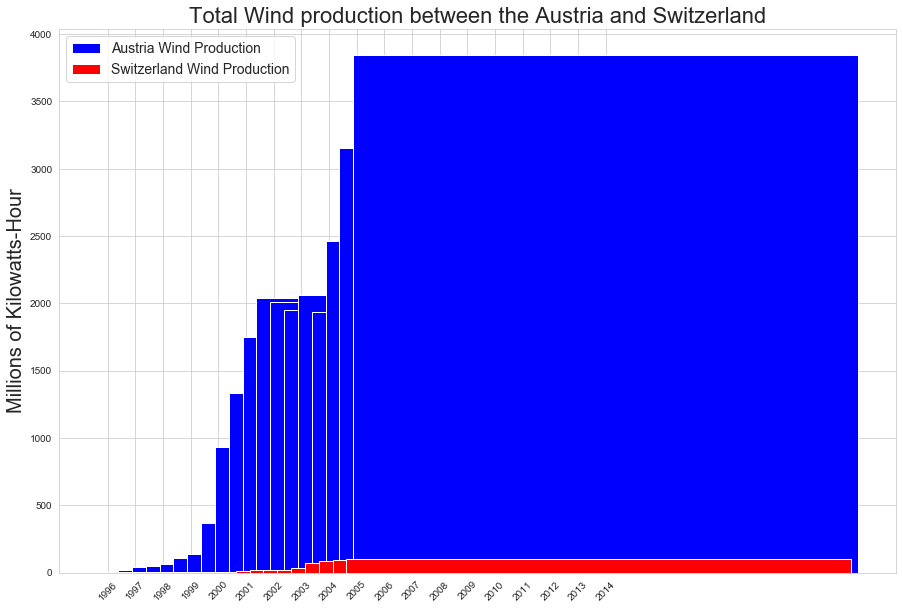

In [167]:
#Barplot Wind Production

width = 0.25       # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(DACH_Wind["year"], DACH_Wind["Wind Power Austria"], width, color='b')
rects2 = ax.bar(DACH_Wind["year"] + width -.5, DACH_Wind["Wind Power Switzerland"], width, color='r')
#rects3 = ax.bar(DACH_Wind["year"] + width, DACH_Wind["quantity"], width, color='yellow')

ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Total Wind production between the Austria and Switzerland",fontsize=22)
ax.set_xticks(DACH_Wind["year"])
ax.set_xticklabels(DACH_Wind["year"], rotation=45)

#ax.legend((rects1[0], rects2[0],rects3[0]), ('India Wind Production', 'Canada Wind Production',
                                             #'UK Wind Production' ), fontsize=14)
ax.legend((rects1[0], rects2[0]),('Austria Wind Production', 'Switzerland Wind Production'), fontsize=14)
    
plt.show()

In [172]:
yw1 = DACH_Wind["Wind Power Austria"]
xw1 = DACH_Wind.year
yw2 = DACH_Wind["Wind Power Switzerland"]
xw2 = DACH_Wind.year
yw3 = DACH_Wind["quantity"]
xw3 = DACH_Wind.year

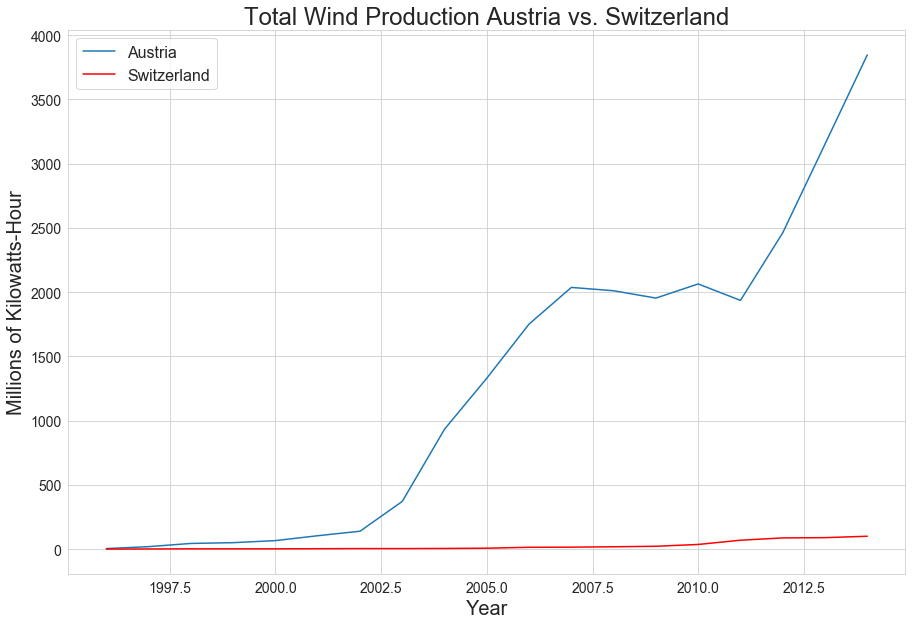

In [173]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(xw1,yw1,label="Austria")
plt.plot(xw2,yw2,'r',label="Switzerland")
#plt.plot(xw3,yw3,'y',label="Germany")


plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production Austria vs. Switzerland',fontsize=24)
plt.show()

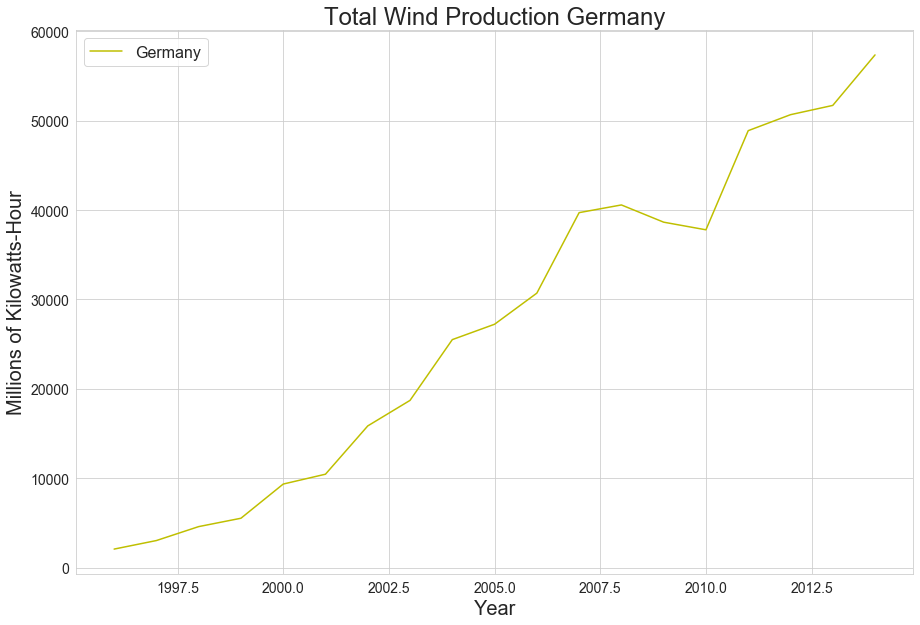

In [174]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(xw3,yw3,'y',label="Germany")


plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production Germany',fontsize=24)
plt.show()